#### **Market Basket Analysis**

Usado como estrategias de marketing. El objetivo es buscar los pares de compras que más frecuentemente aparecen, esto permite generar estrategias de posicionmiento de productos, promociones y planificación de layout de tienda.

Tiene como ventaja que es muy ligero mátematicamente hablando por lo cual es fácil de explicar a no técnicos. Algunos conceptos del lenguaje de market basket son

$$\{A\} \rightarrow \{B\}$$

El término $A$ se le llama antecedente, $B$ el consecuente y se lee como "$A$ implica $B$". Reglas como

$$\{A, B\} \rightarrow \{C, D\}$$


Tomemos como ejemplo la siguientes casos de compra

|Usuario|pan|mantequilla|palta|cerveza|vasos|
|---|---|---|---|---|---|
|Pedro|1|1|0|0|0|
|Antonia|1|1|1|0|0|
|Simón|1|0|1|1|1|
|Coni|1|1|0|0|0
|Roberto|1|1|0|1|1

Lo primero que se viene a la mente es buscar los pares más frecuentes. En particular la cantidad relativa de veces que se repite una regla se le llama **soporte**. Reglas con harto soporte suelen ser las más útiles, pero tambien las más triviales!. El soporte de las reglas individuales son:

|Antecedente|Consecuente|Soporte|
|---|---|---|
|pan|mantequilla|0.8|
|pan|palta|0.4|
|pan|cerveza|0.4|
|pan|vasos|0.4|
|mantequilla|palta|0.2|
|mantequilla|cerveza|0.2|
|mantequilla|vasos|0.2|
|palta|cerveza|0.2|
|palta|vasos|0.2|
|cerveza|vasos|0.4|

notar que 

$$\{pan\} \rightarrow \{mantequilla\}$$

Puede ser muy fuerte pero es poco útil por ser obvia.

El siguente concepto a tener en cuenta es que proporcion de las veces en que se compra el antecedente, se compra el consecuente. Esto se llama **confianza** y se lee como la proporción de veces que la regla es cierta.

$$\hbox{conf}(X \Rightarrow Y) = \dfrac{\hbox{sop}(X \cup Y)}{\hbox{sop}(Y)}$$


Otro concepto más importante a la hora de decidir si la regla aporta, es cuánto mejor es la regla que si todos los productos fueran independientes en los patrones de compras, esto se llama **lift**

$$\hbox{lift}(X \Rightarrow Y) = \dfrac{\hbox{sop}(X \cup Y)}{\hbox{sop}(X) \times \hbox{sop}(X)}$$

Notar que 

$$\hbox{lift}(X \Rightarrow Y) = \dfrac{\hbox{conf}(X \Rightarrow Y)}{\hbox{sop}(X)}$$

Tradicionalemente esas tres métricas bastan para sacar conclusiones, sin embargo hay algunas adicionales que pueden ayudar a facilitar aún más la tarea.

Por como está construido el lift puede presentar problemas pues es simétrico, una medida alternativa al lift es la **convicción**, el cual toma el valor 1 si una regla es independiente y mayor a uno si hay una asociación entre los productos.

$$\hbox{conv}(X \Rightarrow Y) = \dfrac{1 - \hbox{sop}(Y)}{1- \hbox{conf}(X \Rightarrow Y)}$$

En caso de ser menor que 1 se refiere a que normalmente al comprar algo no se compra el otro (efecto canibalización), por el contrario, si son valores altos da un indicio de que la compra es en conjunto (efecto adyacencia)

Por último una forma de medir la "novedad" de una regla es con el **leverage**, la cual indic cuanto más se gana con la co-ocurrencia de un evento frente a otro. Este valor se mueve entre -0.25 y 0.25.

$$\hbox{lev}(X \Rightarrow Y) = \hbox{sop}(X \cup Y) - \hbox{sop}(X)\times \hbox{sop}(Y) $$


Una librería que tiene incorporada las reglas de asociación es la **mlxtend**, la cual es una librería complemente de skitlearn que contiente funcionalidades adicionales. Usaremos la tabla mba.csv, la cual contiene información de varias compras.


In [2]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [8]:
sales = pd.read_excel('mba.xlsx')

In [9]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Se hacen una limpieza a los datos.

In [5]:
sales['Description'] = sales['Description'].str.strip()
sales.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
sales['InvoiceNo'] = sales['InvoiceNo'].astype('str')
sales = sales[~sales['InvoiceNo'].str.contains('C')]

Los datos hay que matriciarlos, es decir dejarlos como matriz con los productos en las columnas y compras en las filas. Por ahora vamos a ver Francia.

In [6]:
basket = (sales[sales['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [7]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Las reglas trabajan de forma binaria, asi que se codificarán en 0 o 1 dependiendo si hubo compras

In [8]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [1]:
basket_sets.head()

NameError: name 'basket_sets' is not defined

Para calcular todas las reglas posibles, suele ser un método lento. Se usa el algoritmo **apriori**, el cual genera un orden de pasos para crear las reglas.

1. Calcular los soportes de todos los eventos individuales, aquellos menores que un umbral son descartados.
2. Calcular los soportes de los pares de los sobrevivientes, todos los con soporte inferior al umbral son descartados.
3. Seguir iterando hasta obtener todas las combinaciones posibles de sobrevivientes


In [12]:
frecuentes = apriori(basket_sets, min_support = 0.05, use_colnames=True)

In [13]:
frecuentes.head()

,support,itemsets
0,0.071429,[4 TRADITIONAL SPINNING TOPS]
1,0.096939,[ALARM CLOCK BAKELIKE GREEN]
2,0.102041,[ALARM CLOCK BAKELIKE PINK]
3,0.094388,[ALARM CLOCK BAKELIKE RED]
4,0.068878,[ASSORTED COLOUR MINI CASES]
5,0.081633,[BAKING SET 9 PIECE RETROSPOT]
6,0.051020,[BLUE HARMONICA IN BOX]
7,0.068878,[CHARLOTTE BAG APPLES DESIGN]
8,0.066327,[CHARLOTTE BAG DOLLY GIRL DESIGN]
9,0.058673,[CHARLOTTE BAG PINK POLKADOT]


In [14]:
rules = association_rules(frecuentes, metric = "lift", min_threshold = 1)
rules.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [15]:
rules.sort_values(['leverage'], ascending = False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
67,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
66,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
83,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.127551,0.102041,0.099490,0.780000,7.644000,0.086474,4.081633
82,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
80,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
85,(SET/6 RED SPOTTY PAPER CUPS),"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",0.137755,0.102041,0.099490,0.722222,7.077778,0.085433,3.232653
64,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
65,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.132653,0.127551,0.102041,0.769231,6.030769,0.085121,3.780612
62,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.132653,0.137755,0.102041,0.769231,5.584046,0.083767,3.736395
63,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.137755,0.132653,0.102041,0.740741,5.584046,0.083767,3.345481


#### **Componentes Principales**

Componentes principales en una metodología que permite crear un nuevo conjunto de variables como combinación lineal de unas variables originales.
Veremos un ejemplo de reducción de unos datos de indicadores educativos de varios paises. Sus columnas son

- **Country Name** Nombre del pais
- **PPT** Población
- **GDP** PIB
- **PRPE** Porcentaje de repitentes en educación primaria
- **OOCP** Niños fuera de educación primaria
- **ESE** Matriculas en educación secundaria
- **EPE** Matriculas en educación primaria
- **UNEMP** Tasa de desempleo
- **LEB** Esperanza de vida al nacer
- **TDP** Duración teórica de la educación primaria


In [103]:
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, plot, iplot
from plotly.graph_objs import *

educ = pd.read_csv('education.csv', sep = ';', decimal = ',', encoding = 'utf-8')[['Country Name','PPT','GDP','PRPE','OOCP',
                                                               'ESE', 'EPE', 'UNEMP', 'LEB', 'TDP']]

In [104]:
educ.head()

,Country Name,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP
0,Albania,1.321986e+10,0.73,7097,333291,195720,16.1,77.83,5
1,United Arab Emirates,4.020000e+11,0.22,14611,411040,409776,3.6,77.37,5
2,Azerbaijan,7.519801e+10,0.16,22821,949294,517708,5.2,70.76,4
3,Burundi,3.093647e+09,24.25,69246,583308,2046794,6.9,56.69,6
4,Belgium,5.320000e+11,2.49,6538,1210112,773568,8.5,80.59,6


Se remueve el nombre del pais

In [105]:
X = educ.iloc[:, 1:]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
pca = PCA()
pc = pca.fit(X)

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



Los valores propios son

In [106]:
pc.explained_variance_

array([2.69169838, 2.15722465, 1.01745968, 0.89432647, 0.75164945,
       0.34595189, 0.25961855, 0.00905506])

Entonces la varianza explicada es

In [107]:
np.cumsum(pc.explained_variance_/np.sum(pc.explained_variance_))

array([0.33120507, 0.59664483, 0.72184006, 0.83188414, 0.92437225,
       0.96694055, 0.9988858 , 1.        ])

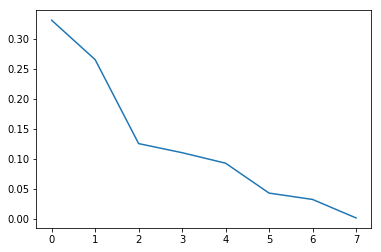

In [108]:
plt.plot(pc.explained_variance_/np.sum(pc.explained_variance_))

Con tres componentes ya explicamos el 75% de la información, entonces podemos reducir la dimension de la data de 9 a 3. Por otra parte un experimento interesante es el gráfico de los dos primeras componentes

In [109]:
cp1 = pc.transform(X)[:, 0]
cp2 = pc.transform(X)[:, 1]

Tr = Scatter(
    x = cp1,
    y = cp2,
    mode = 'markers',
    text = educ['Country Name']
)

Lay = Layout(
    title = 'Educación',
    xaxis = {
        'title': 'CP 1'
    },
    yaxis = {
        'title': 'CP 2'
    }    
)
fig = Figure(data = [Tr], layout = Lay)
plot(fig)

'temp-plot.html'

Dado esto, cómo sería agrupar grupos de paises?

In [110]:
from sklearn import cluster as cl

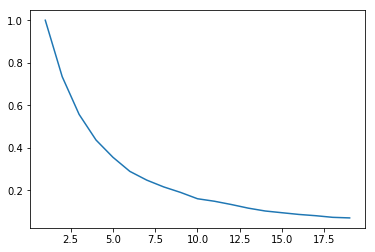

In [112]:
def get_SCW(k):
    kme = cl.KMeans(n_clusters = k)
    kme.fit(X) 
    return kme.inertia_

W = []
for i in range(1, 20):
    W.append(get_SCW(i))
lifts = (W)/W[0]    
plt.plot(range(1,20), lifts)
plt.show()    

No es tan claro, puede ser 6, pero por simplicidad e interpretabilidad usar 3

In [123]:
kme = cl.KMeans(n_clusters = 3)
kme.fit(X) 
clust = kme.predict(X)

In [124]:
cp1 = pc.transform(X)[:, 0]
cp2 = pc.transform(X)[:, 1]

Tr = Scatter(
    x = cp1,
    y = cp2,
    mode = 'markers',
    text = educ['Country Name'],
    marker = {'color': clust}
)

Lay = Layout(
    title = 'Educación',
    xaxis = {
        'title': 'CP 1'
    },
    yaxis = {
        'title': 'CP 2'
    }    
)
fig = Figure(data = [Tr], layout = Lay)
plot(fig)

'temp-plot.html'

##### **Kernel PCA**

Cuando se busca predicción una forma típica de proceder es generar muchas variables y aplicar PCA. El Kernel PCA imita este concepto, generando muchas variables mediante un Kernel y luego aplicando PCA.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

Se ajusta el Kernel PCA de acuerdo a un kernel radial, es decir: 

$$K(x, y) = \exp \left(-\gamma ||x-y||^2 \right)$$


In [17]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

Se grafican las separciones

Populating the interactive namespace from numpy and matplotlib


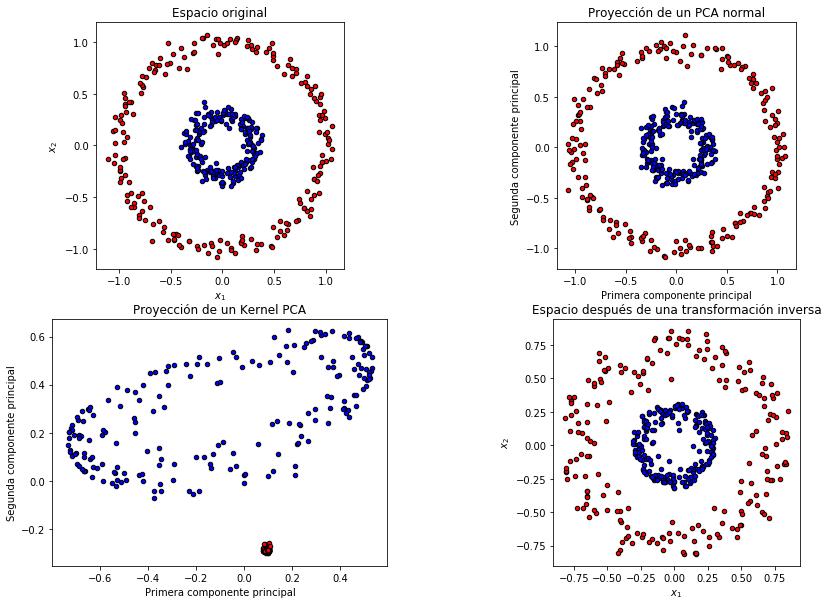

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Proyección de un PCA normal")
plt.xlabel("Primera componente principal")
plt.ylabel("Segunda componente principal")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Proyección de un Kernel PCA")
plt.xlabel("Primera componente principal")
plt.ylabel("Segunda componente principal")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Espacio después de una transformación inversa")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()

Al igual que en componentes principales se puede obtener un $\lambda$

In [19]:
e_var = np.var(X_kpca, axis=0)
e_varr = e_var / np.sum(e_var)